In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# simran: cd /content/drive/MyDrive/Colab\ Notebooks

In [ ]:
# ref for Srikar 
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
# ref for Xiangchen
%cd 143 projects

/content/drive/MyDrive/143 projects


In [ ]:
# ref for Steven
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
# red for Yuchao
# %cd drive/MyDrive
%ls

WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:

import io
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation


df1 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Task 1 for simran: basic preprocessing done
# Next Task for simran: Analyzing correlation matrix

df = df1
df = df.drop(columns=["EmployeeNumber","EmployeeCount", "StandardHours"])
df = df.replace({
    "Attrition": {
        'Yes':1,
        'No': 0
        },
    "BusinessTravel": {
        "Travel_Rarely":0,
        "Travel_Frequently":1
    },
    "Overtime": {
        'Yes':1,
        'No':0
    },
    'Education': {
        1 : "Below College",
        2 : "College",
        3 : "Bachelors", 
        4 : "Masters", 
        5 : "PhD"
    },
    "JobInvolvement": {
        1 : "Low",
        2 : "Medium",
        3 : "High",
        4 : "Very High"
    },
    "JobSatisfaction": {
        1 : "Low",
        2 : "Medium",
        3 : "High",
        4 : "Very High"
    },
    "PerformanceRating": {
        1 : "Low",
        2 : "Medium",
        3 : "High",
        4 : "Very High"
    }
})
df.head(3)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,Sales,1,College,Life Sciences,2,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,High,1,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,Below College,Life Sciences,3,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Very High,4,1,10,3,3,10,7,1,7
2,37,1,0,1373,Research & Development,2,College,Other,4,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,High,2,0,7,3,3,0,0,0,0


In [ ]:
df[['Attrition','Age','DistanceFromHome','Gender','MonthlyIncome','OverTime','JobRole','Department']]
df_new=df.copy()
df_new['growth']=df['MonthlyIncome']/df['TotalWorkingYears']

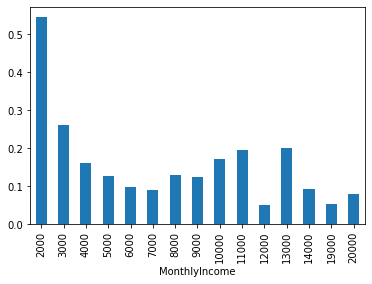

In [ ]:
# slightly better way to do the above using 'df.apply' functions
# normalize monthly income and plot the relation between monthly income to attrition rate
def normalize_x(x):
  '''
  normalize monthly income in to groups

  Param:
    x: int
  
  Return:
    x: int
  '''
  assert isinstance(x, int)
  assert x >= 0

  import math
  return math.ceil(x/1000)*1000

df1['MonthlyIncome'] = df1['MonthlyIncome'].apply(normalize_x)
df1.groupby('MonthlyIncome')['Attrition'].value_counts(normalize=True)[:, 'Yes'].plot(kind='bar')

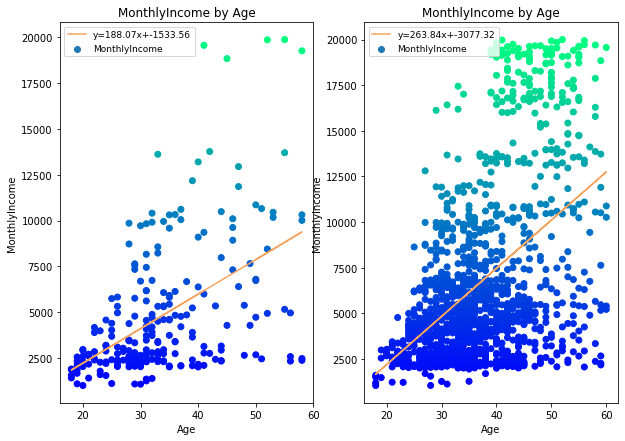

In [ ]:
  # The question is how salary rise do we need to stay in the company as age increases
  # First we divide the dataframe into those who attrited from the company and those who do not.
  # Then we plot their age vs their monthly income and compute the regression line for these two groups and compare their difference

  fig, ax = plt.subplots(figsize=(10,7), nrows=1, ncols=2)
  df_attrited = df1.loc[df1['Attrition'] == 'Yes']
  df_remained = df1.loc[df1['Attrition'] == 'No']

  ax[0].scatter(data=df_attrited, x='Age', y='MonthlyIncome', c='MonthlyIncome', cmap='winter')
  ax[0].set(title='MonthlyIncome by Age', xlabel='Age', ylabel='MonthlyIncome')
  ax[1].scatter(data=df_remained, x='Age', y='MonthlyIncome', c='MonthlyIncome', cmap='winter')
  ax[1].set(title='MonthlyIncome by Age', xlabel='Age', ylabel='MonthlyIncome')

  m, b = np.polyfit(df_attrited.Age, df_attrited.MonthlyIncome, 1)
  ax[0].plot(df_attrited.Age, m * df_attrited.Age + b, c='sandybrown', label='y={:.2f}x+{:.2f}'.format(m,b))
  ax[0].legend(fontsize=9, loc='upper left')

  m, b = np.polyfit(df_remained.Age, df_remained.MonthlyIncome, 1)
  ax[1].plot(df_remained.Age, m * df_remained.Age + b, c='sandybrown', label='y={:.2f}x+{:.2f}'.format(m,b))
  ax[1].legend(fontsize=9, loc='upper left')

  plt.show()

376.89602381273727
479.068198798516


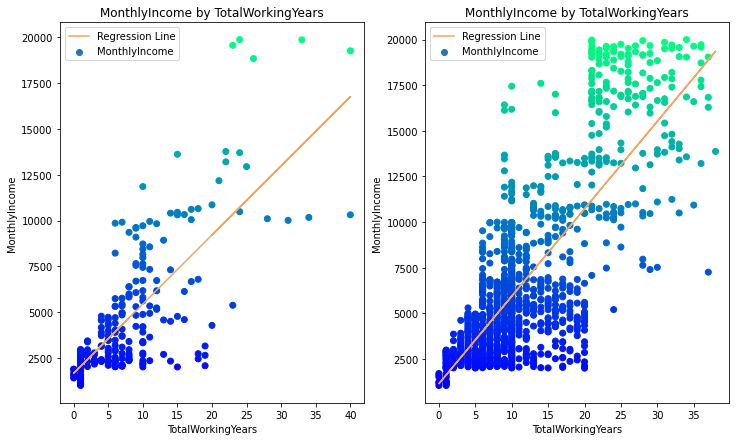

In [ ]:
# add comments here

# The question is how salary rise do we need to stay in the company as age increases
# First we divide the dataframe into those who attrited from the company and those who do not.
# Then we plot their age vs their monthly income and compute the regression line for these two groups and compare their difference

fig, ax = plt.subplots(figsize=(12,7), nrows=1, ncols=2)
df_attrited = df1.loc[df1['Attrition'] == 'Yes']
df_remained = df1.loc[df1['Attrition'] == 'No']

ax[0].scatter(data=df_attrited, x='TotalWorkingYears', y='MonthlyIncome', c='MonthlyIncome', cmap='winter')
ax[0].set(title='MonthlyIncome by TotalWorkingYears', xlabel='TotalWorkingYears', ylabel='MonthlyIncome')
ax[1].scatter(data=df_remained, x='TotalWorkingYears', y='MonthlyIncome', c='MonthlyIncome', cmap='winter')
ax[1].set(title='MonthlyIncome by TotalWorkingYears', xlabel='TotalWorkingYears', ylabel='MonthlyIncome')

m, b = np.polyfit(df_attrited.TotalWorkingYears, df_attrited.MonthlyIncome, 1)
print(m)
ax[0].plot(df_attrited.TotalWorkingYears, m * df_attrited.TotalWorkingYears + b, c='sandybrown', label='Regression Line')
ax[0].legend(fontsize=10, loc='upper left')

m, b = np.polyfit(df_remained.TotalWorkingYears, df_remained.MonthlyIncome, 1)
print(m)
ax[1].plot(df_remained.TotalWorkingYears, m * df_remained.TotalWorkingYears + b, c='sandybrown', label='Regression Line')
ax[1].legend(fontsize=10, loc='upper left')

plt.show()

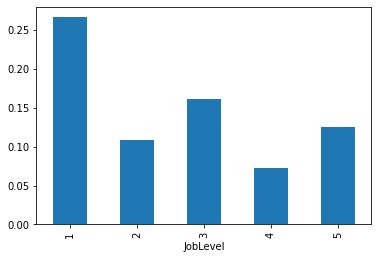

In [ ]:
dfMale = df1[df1['Gender'] == 'Male']
dfFemale = df1[df1['Gender'] == 'Female']

dfMale.groupby('JobLevel')['Attrition'].value_counts(normalize=True)[:, 'Yes'].plot(kind='bar')
dfFemale.groupby('JobLevel')['Attrition'].value_counts(normalize=True)[:, 'Yes'].plot(kind='bar')

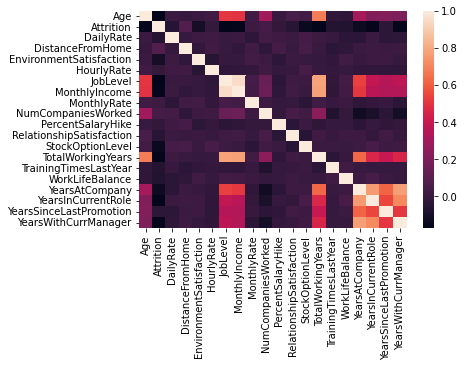

In [ ]:
# df
# attrited = df[df['Attrition']=='Yes']
# remain = df[df['Attrition']=='No']
# age_attr=attrited["Age"]
# level_attr = attrited["JobLevel"]
# correlation = age_attr.corr(level_attr)
# print(correlation)

# attr_corr = attrited.corr()
# remain_corr = remain.corr()
# sns.heatmap(df.corr())
# df['DerivedTimeAtCompanyMetric'] = df.apply(lambda row: row.YearsAtCompany + row.YearsInCurrentRole+row.YearsSinceLastPromotion+row.YearsWithCurrManager, axis=1)
# df['DerivedTotalWorkedMetric'] = df.apply(lambda row: row.Age + row.NumCompaniesWorked+row.TotalWorkingYears, axis=1)
# df = df.drop(columns=["YearsAtCompany","YearsInCurrentRole", "YearsSinceLastPromotion","YearsWithCurrManager","Age","NumCompaniesWorked","TotalWorkingYears"])
df=(df-df.mean())/df.std()

sns.heatmap(df.corr())

# attr_corr_sig = attr_corr[attr_corr>0.4 or attr_corr<-0.1]
# rem_corr_sig = rem_corr[rem_corr>0.4 or rem_corr<-0.1]


In [ ]:
def plot_line(col:str):
  ax = sns.kdeplot(x = df.loc[df.Attrition == 0][col], label = "Still Employed", color = "steelblue")
  ax = sns.kdeplot(x = df.loc[df.Attrition == 1][col], label = "Left Company", color = "red")
  min_val=min(df[col])
  max_val=max(df[col])
  ax.set_title('{} comparison among two groups'.format(col))
  ax.set_xlabel(col)
  ax.set_xlim(min_val,max_val)
  ax.legend()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  return ax

In [ ]:
def plot_line_remove_ytick(col:str):
  ax = sns.kdeplot(x = df.loc[df.Attrition == 0][col], label = "Still Employed", color = "steelblue")
  ax = sns.kdeplot(x = df.loc[df.Attrition == 1][col], label = "Left Company", color = "red")
  min_val=min(df[col])
  max_val=max(df[col])
  ax.set_title('{} comparison among two groups'.format(col))
  ax.set_xlabel(col)
  ax.set_xlim(min_val,max_val)
  ax.set(yticklabels=[])
  ax.legend()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  return ax

In [ ]:
df['growth']=df_new['growth']
df.drop(df.loc[df['growth']>10000].index,axis=0,inplace=True)

numpy.float64

In [ ]:
# read csv and seperate into two categories according to attrition
# First select all numerical cols
df_attrited=df.loc[df['Attrition']==1].reset_index(drop=True)
df_remain=df.loc[df['Attrition']==0].reset_index(drop=True)

num_col=df.select_dtypes('number').columns.to_list()
cat_col=df.select_dtypes(object).columns.to_list()

num_col.remove('Attrition')
print(num_col)


df_attrited=df_attrited[num_col]
df_remain=df_remain[num_col]

['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'growth']


In [ ]:
# two sample t tests for each numerical columns
# select those with p value less than 0.05
p_vals={}
for i in num_col:
    mean_attrited=np.mean(df_attrited[i])
    mean_remain=np.mean(df_remain[i])
#     print('mean {0} in attrited group is {1}, while in remain group is {2}'.format(i,str(mean_attrited),str(mean_remain)))
    ttest,pval = stats.ttest_ind(df_attrited[i],df_remain[i])
    p_vals[i]=round(pval,3)
#     print("p-value for {} is: \n".format(i),pval)
df_pval=pd.DataFrame(p_vals,index=['p_value']).T
df_pval_reject=df_pval.loc[df_pval['p_value']<=0.05].T

In [ ]:
df_new=df_pval_reject[['Age','MonthlyIncome','DistanceFromHome','growth']]
df_new.rename({'growth':'IncomeGrowthPerWorkyear'},axis=1,inplace=True)
df_new.T

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,p_value
Age,0.000
MonthlyIncome,0.000
DistanceFromHome,0.002
IncomeGrowthPerWorkyear,0.000


In [ ]:
plot_line('Age')

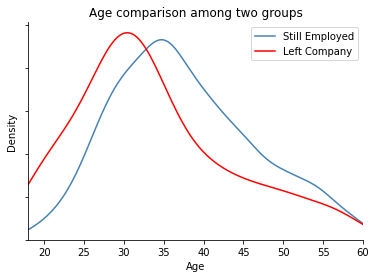

In [ ]:
plot_line_remove_ytick('Age')

In [ ]:
# Try animation

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
plot_line('MonthlyIncome')

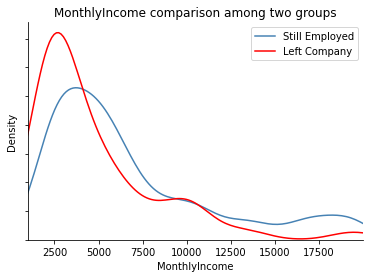

In [ ]:
plot_line_remove_ytick('MonthlyIncome')

In [ ]:
plot_line('DistanceFromHome')

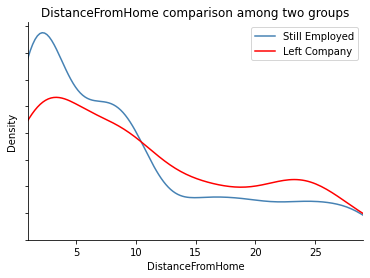

In [ ]:
plot_line_remove_ytick('DistanceFromHome')

In [ ]:
plot_line('TotalWorkingYears')

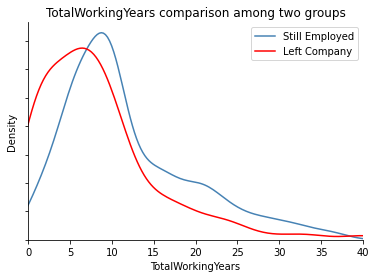

In [ ]:
plot_line_remove_ytick('TotalWorkingYears')

In [ ]:
df_pval_reject.T.sort_values(ascending=True,by='p_value')

,p_value
Age,0.000
EnvironmentSatisfaction,0.000
JobLevel,0.000
MonthlyIncome,0.000
StockOptionLevel,0.000
TotalWorkingYears,0.000
YearsAtCompany,0.000
YearsInCurrentRole,0.000
YearsWithCurrManager,0.000
DistanceFromHome,0.003


In [ ]:
# numerical columns
df1[['Attrition', 'EmployeeNumber', 'Age','DistanceFromHome', 'HourlyRate', 'DailyRate', 
    'MonthlyRate', 'MonthlyIncome', 'PercentSalaryHike', 
    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager','NumCompaniesWorked','TrainingTimesLastYear']].head()

,Attrition,EmployeeNumber,Age,DistanceFromHome,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked,TrainingTimesLastYear
0,Yes,1,41,1,94,1102,19479,5993,11,8,6,4,0,5,8,0
1,No,2,49,8,61,279,24907,5130,23,10,10,7,1,7,1,3
2,Yes,4,37,2,92,1373,2396,2090,15,7,0,0,0,0,6,3
3,No,5,33,3,56,1392,23159,2909,11,8,8,7,3,0,1,3
4,No,7,27,2,40,591,16632,3468,12,6,2,2,2,2,9,3


In [ ]:
# categorical columns
df1[['Attrition', 'EmployeeNumber', 'Gender', 'OverTime', 'MaritalStatus',
    'EnvironmentSatisfaction', 'JobSatisfaction','RelationshipSatisfaction', 
    'WorkLifeBalance', 'JobInvolvement', 
    'PerformanceRating','BusinessTravel','Education','EducationField',
    'JobLevel','JobRole','Department','StockOptionLevel']].head()

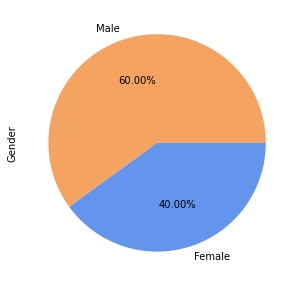

In [ ]:
# Analysis on categorical columns
# 1. Attrition results on Gender
# a) Direct percentage difference on Male and Female
# or direct use Simran's plots with box plot ~
df1['Gender'].value_counts().plot.pie(figsize=(7, 5), colors = ['sandybrown','cornflowerblue'], autopct='%.2f%%', rot=0)

In [ ]:
# b) Attrition counts on Male and Female
df1[['Gender', 'Attrition']].value_counts().unstack().plot.bar(figsize=(7, 5), xlabel='Gender', ylabel='Counts',color = ['sandybrown','cornflowerblue'], rot=0)


In [ ]:
# b) Attrition counts on Male and Female in percentage
df1.groupby('Gender')['Attrition'].value_counts(normalize=True)[:, 'Yes'].plot.bar()

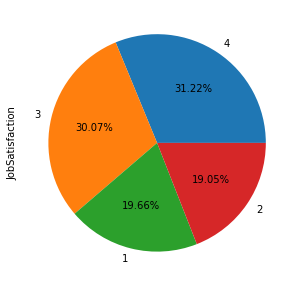

In [ ]:
# 2. Attrition results on JobSatisfaction
df1['JobSatisfaction'].value_counts().plot.pie(figsize=(7, 5), autopct='%.2f%%', rot=0)


In [ ]:
# The table shows percentages on different job satisfaction based on Attrition Yes or No respectively
attr_jobSatisfaction = df1[['Attrition', 'JobSatisfaction']].value_counts().unstack()
percentage_attr_jobSatis = attr_jobSatisfaction.T/attr_jobSatisfaction.apply(sum, axis=1)*100
percentage_attr_jobSatis

Attrition,No,Yes
JobSatisfaction,,
1,18.085969,27.848101
2,18.978102,19.409283
3,29.927007,30.801688
4,33.008921,21.940928


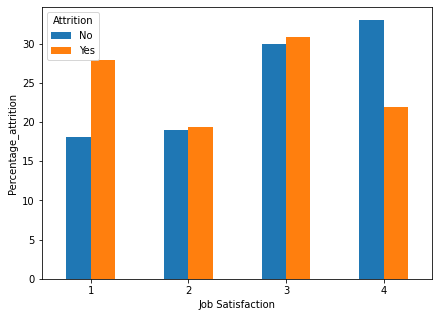

In [ ]:
percentage_attr_jobSatis.plot.bar(figsize=(7, 5), xlabel='Job Satisfaction', ylabel='Percentage_attrition',rot=0)

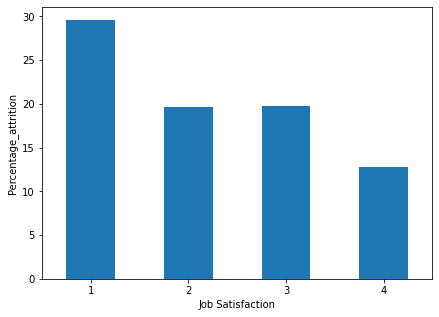

In [ ]:
# did some normalization -
# this gives a ratio of the number of people who left with the number of people who stayed. 
# clearly the lower the job satisfaction level, the higher the ratio. 

# I'll see if there's room for better analysis. Let me know if something comes to mind as well. 
def percent(x):
    return (x['Yes']/x['No'])*100

a = df1[['Attrition', 'JobSatisfaction']].value_counts().unstack()
a.apply(percent, axis=0).plot.bar(figsize=(7, 5), xlabel='Job Satisfaction', ylabel='Percentage_attrition',rot=0)

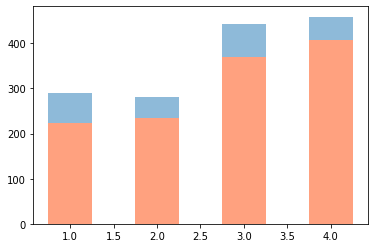

In [ ]:
# This is another way to show comparison between two indices across columns. 
# Not sure if this is the right kind of plot to show for this particular metric
# figuring out how to show values in them. 
rect1 = plt.bar(a.columns.to_numpy().ravel(), a.loc[['No']].to_numpy().ravel(),
                width=0.5, color='orangered', alpha=0.5)
rect2 = plt.bar(a.columns.to_numpy().ravel(), a.loc[['Yes']].to_numpy().ravel(),
                bottom=a.loc[['No']].to_numpy().ravel(), width=0.5, color='#1f77b4', alpha=0.5)

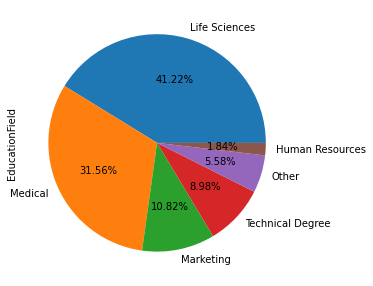

In [ ]:
# 3. Attrition results on EducationField
df1['EducationField'].value_counts().plot.pie(figsize=(7, 5), autopct='%.2f%%', rot=0)


In [ ]:
attr_eduField = df1[['Attrition', 'EducationField']].value_counts().unstack()
# The percentages between Attrition No and Yes are similar according to different Education Fields
percentage_attr_eduField = attr_eduField.T/attr_eduField.apply(sum, axis=1)*100
percentage_attr_eduField

Attrition,No,Yes
EducationField,,
Human Resources,1.622060,2.953586
Life Sciences,41.930251,37.552743
Marketing,10.056772,14.767932
Medical,32.522303,26.582278
Other,5.758313,4.641350
Technical Degree,8.110300,13.502110


In [ ]:
# The percentages among different Education Fields according to Attrition No and Yes
# Next two block could show Human Resources, Marketing and Technical Degree having obviously higher rate of attrition
# While Life Sciences and Medical having higher rate of remained to work
percentage_eduField_attr = attr_eduField/attr_eduField.apply(sum, axis=0)*100
percentage_eduField_attr

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,74.074074,85.313531,77.987421,86.422414,86.585366,75.757576
Yes,25.925926,14.686469,22.012579,13.577586,13.414634,24.242424


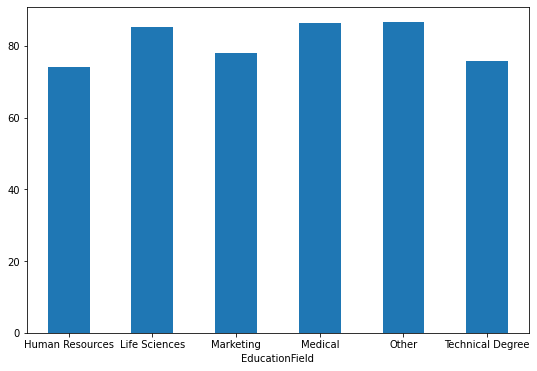

In [ ]:
percentage_eduField_attr.loc['No'].plot.bar(figsize=(9, 6), rot=0)

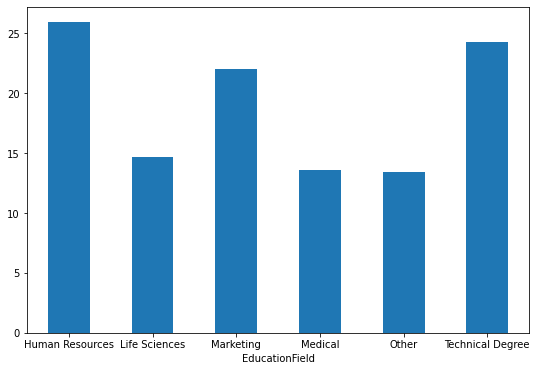

In [ ]:
percentage_eduField_attr.loc['Yes'].plot.bar(figsize=(9, 6), rot=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


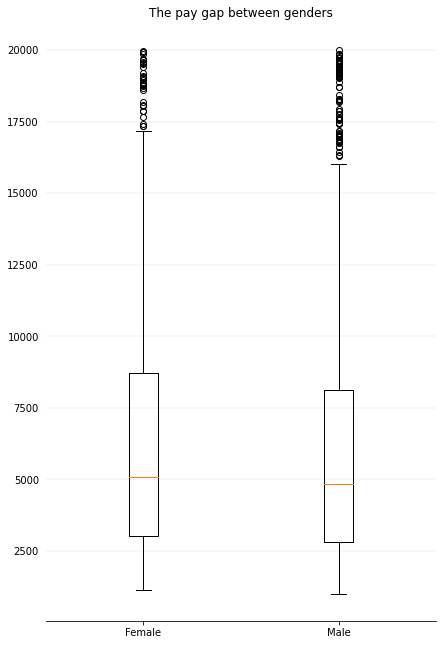

75 51


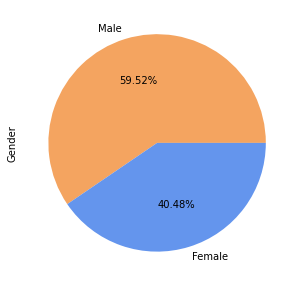

In [ ]:
import matplotlib.pyplot as plt

df = df1.filter(['MonthlyIncome','Gender'], axis=1)
df['Gender']= np.where(df['Gender'] == 'Male', 'Male', df['Gender'])
df['Gender']= np.where(df['Gender'] == 'Female', 'Female', df['Gender'])
male_monthly_income = df[df['Gender'] == 'Male']['MonthlyIncome']
female_monthly_income = df[df['Gender'] == 'Female']['MonthlyIncome']
fig, ax = plt.subplots(figsize=(7, 11))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('The pay gap between genders')

dataset = [female_monthly_income, male_monthly_income]
labels = df['Gender'].unique()
ax.boxplot(dataset, labels=labels)
plt.show()


rslt_df = df[df['MonthlyIncome'] > 16000]
print(len(rslt_df[rslt_df['Gender']=="Male"]), len(rslt_df[rslt_df['Gender']=="Female"]))
rslt_df['Gender'].value_counts().plot.pie(figsize=(7, 5), colors = ['sandybrown','cornflowerblue'], autopct='%.2f%%', rot=0)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


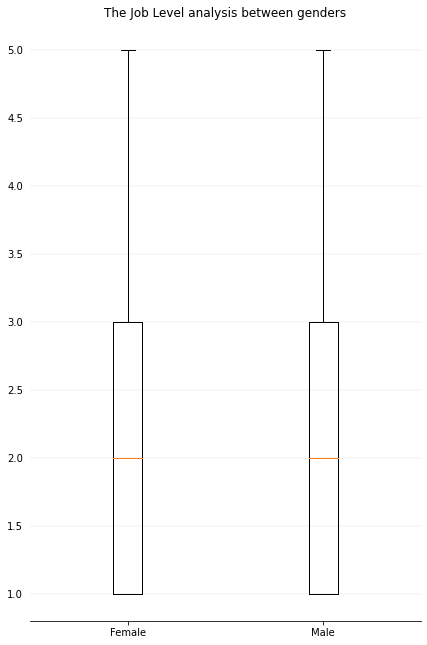

100 75


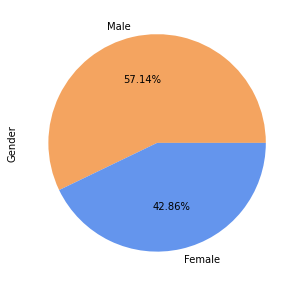

In [ ]:
import matplotlib.pyplot as plt

df = df1.filter(['JobLevel','Gender'], axis=1)
df['Gender']= np.where(df['Gender'] == 'Male', 'Male', df['Gender'])
df['Gender']= np.where(df['Gender'] == 'Female', 'Female', df['Gender'])
male_joblevel = df[df['Gender'] == 'Male']['JobLevel']
female_joblevel = df[df['Gender'] == 'Female']['JobLevel']
fig, ax = plt.subplots(figsize=(7, 11))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('The Job Level analysis between genders')

dataset = [female_joblevel, male_joblevel]
labels = df['Gender'].unique()
ax.boxplot(dataset, labels=labels)
plt.show()


rslt_df = df[df['JobLevel'] > 3]
print(len(rslt_df[rslt_df['Gender']=="Male"]), len(rslt_df[rslt_df['Gender']=="Female"]))
rslt_df['Gender'].value_counts().plot.pie(figsize=(7, 5), colors = ['sandybrown','cornflowerblue'], autopct='%.2f%%', rot=0)

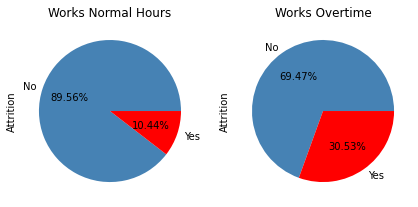

In [ ]:
# df1[['OverTime', 'Attrition']].value_counts().unstack().plot.bar(figsize=(7, 5), xlabel='OverTime', ylabel='Counts',rot=0)
df = df1.filter(['OverTime','Attrition'], axis=1)
overtime_df = df[df['OverTime'] =='Yes']
normal_df = df[df['OverTime'] == 'No']
fig, ax = plt.subplots(1,2, figsize = (16,4))
normal_df['Attrition'].value_counts().plot.pie(figsize=(7, 5), colors = ['steelblue','red'], autopct='%.2f%%', rot=0, ax = ax[0], title = "Works Normal Hours")
overtime_df['Attrition'].value_counts().plot.pie(figsize=(7, 5), colors = ['steelblue','red'], autopct='%.2f%%', rot=0, ax = ax[1], title = "Works Overtime")



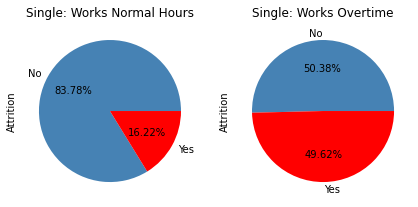

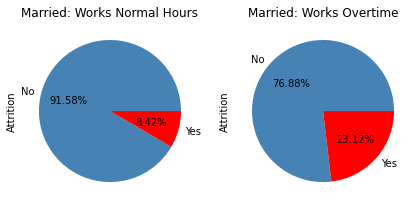

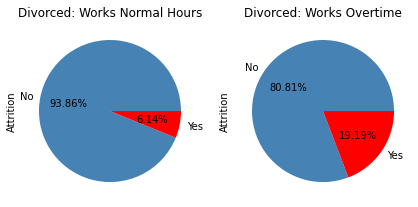

In [ ]:
# df1[['OverTime', 'Attrition']].value_counts().unstack().plot.bar(figsize=(7, 5), xlabel='OverTime', ylabel='Counts',rot=0)
df = df1.filter(['OverTime','Attrition','MaritalStatus'], axis=1)
for status in ["Single","Married","Divorced"]:
  temp_df = df[df["MaritalStatus"]==status]
  overtime_df = temp_df[temp_df['OverTime'] =='Yes']
  normal_df = temp_df[temp_df['OverTime'] == 'No']
  fig, ax = plt.subplots(1,2, figsize = (16,4))
  normal_df['Attrition'].value_counts().plot.pie(figsize=(7, 5), colors = ['steelblue','red'], autopct='%.2f%%', rot=0, ax = ax[0], title = status+": Works Normal Hours")


  overtime_df['Attrition'].value_counts().plot.pie(figsize=(7, 5), colors = ['steelblue','red'], autopct='%.2f%%', rot=0, ax = ax[1], title = status+": Works Overtime")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


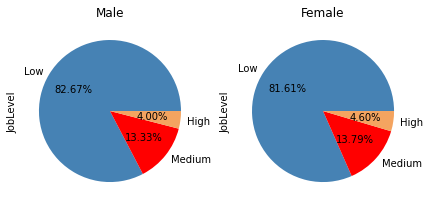

In [ ]:
# Plot job level percentage to those who attrited in male and female group

maleAttrited = df1[(df1['Attrition'] == 'Yes') & (df1['Gender'] == 'Male')]
femaleAttrited = df1[(df1['Attrition'] == 'Yes') & (df1['Gender'] == 'Female')]

def jobLevelNormalize(level):
  '''
  group job level
  '''
  assert isinstance(level, int) and 1 <= level <= 5
  if level <= 2:
    return 'Low'
  elif level >=4:
    return 'High'
  else:
    return "Medium"

maleAttrited['JobLevel'] = maleAttrited['JobLevel'].apply(jobLevelNormalize)
femaleAttrited['JobLevel'] = femaleAttrited['JobLevel'].apply(jobLevelNormalize)

fig, ax = plt.subplots(1,2, figsize = (16,5))
maleAttrited['JobLevel'].value_counts().plot.pie(figsize=(7, 5), colors = ['steelblue', 'red', 'sandybrown'], autopct='%.2f%%', rot=0, ax = ax[0], title = "Attrited Male")
femaleAttrited['JobLevel'].value_counts().plot.pie(figsize=(7, 5), colors = ['steelblue', 'red', 'sandybrown'], autopct='%.2f%%', rot=0, ax = ax[1], title = "Attrited Female")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


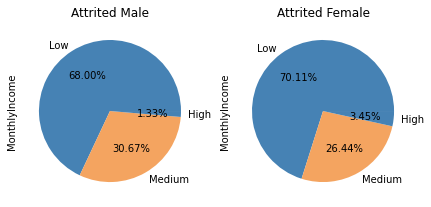

In [ ]:
maleAttrited = df1[(df1['Attrition'] == 'Yes') & (df1['Gender'] == 'Male')]
femaleAttrited = df1[(df1['Attrition'] == 'Yes') & (df1['Gender'] == 'Female')]

def incomeNormalize(income):
  '''
  group income level

  Param:
    income: int

  Return:
    level: str
  '''
  assert isinstance(income, int)

  if income <= 5000:
    return 'Low'
  elif income >= 15000:
    return 'High'
  else:
    return "Medium"

maleAttrited['MonthlyIncome'] = maleAttrited['MonthlyIncome'].apply(incomeNormalize)
femaleAttrited['MonthlyIncome'] = femaleAttrited['MonthlyIncome'].apply(incomeNormalize)

fig, ax = plt.subplots(1,2, figsize = (16,5))
maleAttrited['MonthlyIncome'].value_counts().plot.pie(figsize=(7, 5), colors = ['steelblue', 'sandybrown'], autopct='%.2f%%', rot=0, ax = ax[0], title = "Attrited Male")
femaleAttrited['MonthlyIncome'].value_counts().plot.pie(figsize=(7, 5), colors = ['steelblue', 'sandybrown'], autopct='%.2f%%', rot=0, ax = ax[1], title = "Attrited Female")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


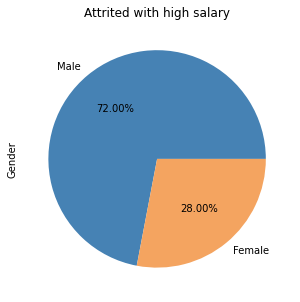

In [ ]:
attrited = df1[df1['Attrition'] == 'Yes']

def incomeNormalize(income):
  assert isinstance(income, int)

  if income <= 10000:
    return 'Low'
  else:
    return "High"

attrited['MonthlyIncome'] = attrited['MonthlyIncome'].apply(incomeNormalize)
highIncome_df = attrited[attrited['MonthlyIncome'] == 'High']

highIncome_df['Gender'].value_counts().plot.pie(figsize=(7, 5), colors = ['steelblue', 'sandybrown'], autopct='%.2f%%', rot=0, title = "Attrited with high salary")

In [ ]:

# import matplotlib.pyplot as plt

# df = df1.filter(['JobSatisfaction','Gender'], axis=1)
# df['Gender']= np.where(df['Gender'] == 'Male', 'Male', df['Gender'])
# df['Gender']= np.where(df['Gender'] == 'Female', 'Female', df['Gender'])
# male_monthly_income = df[df['Gender'] == 'Male']['JobSatisfaction']
# female_monthly_income = df[df['Gender'] == 'Female']['JobSatisfaction']
# fig, ax = plt.subplots(figsize=(7, 11))
# # Remove top and right border
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# # Remove y-axis tick marks
# ax.yaxis.set_ticks_position('none')
# # Add major gridlines in the y-axis
# ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# # Set plot title
# ax.set_title('The job satisfaction analysis between genders')

# dataset = [female_monthly_income, male_monthly_income]
# labels = df['Gender'].unique()
# ax.boxplot(dataset, labels=labels)
# plt.show()


# rslt_df = df[df['JobSatisfaction'] > 2]
# print(len(rslt_df[rslt_df['Gender']=="Male"]), len(rslt_df[rslt_df['Gender']=="Female"]))
# rslt_df['Gender'].value_counts().plot.pie(figsize=(7, 5), colors = ['sandybrown','cornflowerblue'], autopct='%.2f%%', rot=0)

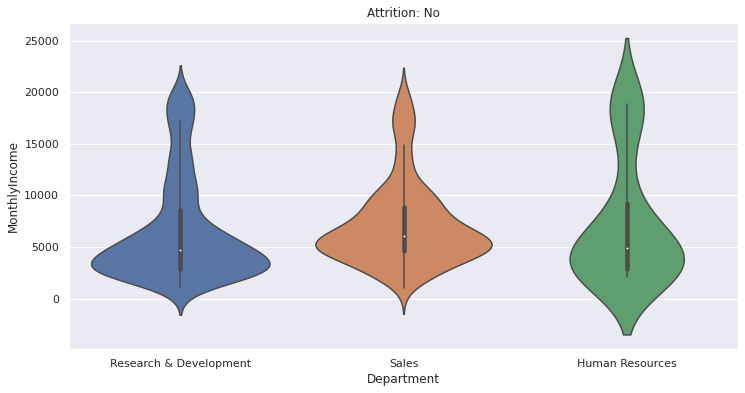

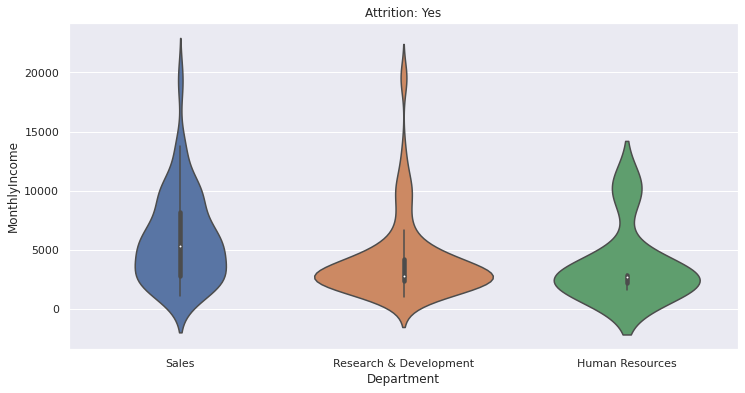

In [ ]:
def violinPlot(xCol, yCol, subplotCol, subplotVal):
    plt.figure(figsize=(12,6))
    sns.set(color_codes=True)
    subplotData = df1.loc[df1[subplotCol] == subplotVal][[xCol, yCol]]
    sns.violinplot(x=xCol, y=yCol, data=subplotData).set_title(subplotCol +': %s' % subplotVal)
    plt.show()
    
violinPlot('Department', 'MonthlyIncome', 'Attrition', 'No')
violinPlot('Department', 'MonthlyIncome', 'Attrition', 'Yes')

# monthly income leads to most of attrition in HR and Sales department
# but some workers with high income in research and developent department also leave the company
# may be extract those income > 10000, and deep analysis for their further leaving reasons

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,Sales,1,College,Life Sciences,2,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,High,1,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,Below College,Life Sciences,3,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Very High,4,1,10,3,3,10,7,1,7
2,37,1,0,1373,Research & Development,2,College,Other,4,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,High,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,Research & Development,3,Masters,Life Sciences,4,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,High,3,0,8,3,3,8,7,3,0
4,27,0,0,591,Research & Development,2,Below College,Medical,1,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,High,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,Research & Development,23,College,Medical,3,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,Y,No,17,High,3,1,17,3,3,5,2,0,3
1466,39,0,0,613,Research & Development,6,Below College,Medical,4,Male,42,Medium,3,Healthcare Representative,Low,Married,9991,21457,4,Y,No,15,High,1,1,9,5,3,7,7,1,7
1467,27,0,0,155,Research & Development,4,Bachelors,Life Sciences,2,Male,87,Very High,2,Manufacturing Director,Medium,Married,6142,5174,1,Y,Yes,20,Very High,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,Sales,2,Bachelors,Medical,4,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,Y,No,14,High,4,0,17,3,2,9,6,0,8


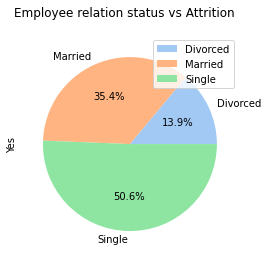

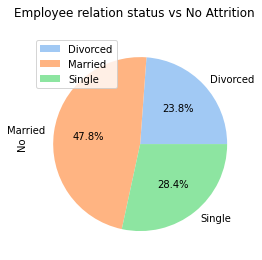

In [ ]:
marital_status_vs_att = df[['MaritalStatus', 'Attrition']]
marital_status_vs_att = marital_status_vs_att.replace({
    "Attrition": {
        0: 'No',
        1: 'Yes'
    }
})
grp = marital_status_vs_att.groupby(by='Attrition')
colors = sns.color_palette('pastel')[0:5]
grp.get_group('Yes').value_counts().unstack().plot(kind='pie', 
                                               title='Employee relation status vs Attrition',
                                               colors = colors,
                                               subplots=True, 
                                               autopct="%.1f%%")
plt.legend(loc='upper right')
grp.get_group('No').value_counts().unstack().plot(kind='pie',
                                               title='Employee relation status vs No Attrition',
                                               colors = colors,
                                               subplots=True, 
                                               autopct="%.1f%%")
plt.legend(loc='upper left')

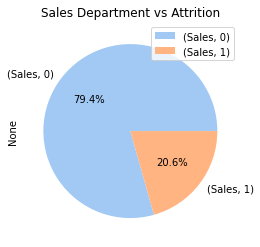

In [ ]:
# department wise attrition plots. 
# NEED TO CLEAN UP TITLES AND AXES
department_wise_group = df[['Department', 'Attrition']].value_counts().groupby(by='Department')
colors = sns.color_palette('pastel')[0:5]
department_wise_group.get_group('Sales').plot(kind='pie', 
                                               title='Sales Department vs Attrition',
                                               colors = colors,
                                               autopct="%.1f%%"
                                               )
plt.legend(loc='upper right')

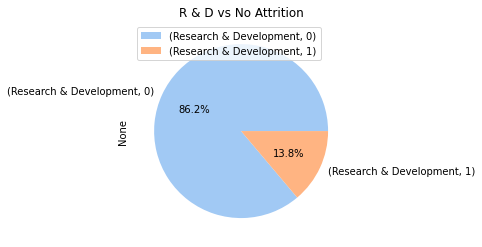

In [ ]:
department_wise_group.get_group('Research & Development').plot(kind='pie',
                                               title='R & D vs No Attrition',
                                               colors = colors,
                                              #  subplots=True, 
                                               autopct="%.1f%%")
plt.legend(loc='upper left')

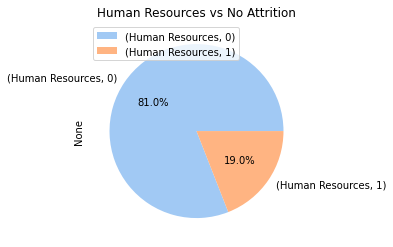

In [ ]:
department_wise_group.get_group('Human Resources').plot(kind='pie',
                                               title='Human Resources vs No Attrition',
                                               colors = colors,
                                              #  subplots=True, 
                                               autopct="%.1f%%")
plt.legend(loc='upper left')

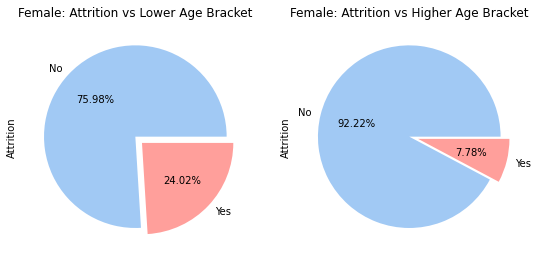

In [ ]:
# updated plots and graphs
# Plot attrition percentages vs Age bracket (>35 or <35) for female employees

df2 = df1[['Age', 'Gender', 'Attrition']]
higherAgeBracketFemale = df2[(df1['Age'] >= 35) & (df1['Gender'] == 'Female')]
lowerAgeBracketFemale = df2[(df1['Age'] < 35) & (df1['Gender'] == 'Female')]

explode = (0,0.1)
higherAgeBracketMale = df2[(df1['Age'] >= 35) & (df1['Gender'] == 'Male')]
lowerAgeBracketMale = df2[(df1['Age'] < 35) & (df1['Gender'] == 'Male')]
fig, ax = plt.subplots(1,2, figsize = (16,5))
fhbcolors = [sns.color_palette('pastel')[0], sns.color_palette('pastel')[3]] 
mhbcolors = [sns.color_palette('pastel')[0], sns.color_palette('pastel')[3]] 
higherAgeBracketFemale['Attrition'].value_counts().plot.pie(figsize=(9, 5),
                                                            colors = fhbcolors,
                                                            autopct='%.2f%%',
                                                            rot=0, ax = ax[1],
                                                            title = "Female: Attrition vs Higher Age Bracket",
                                                            explode=explode)
lowerAgeBracketFemale['Attrition'].value_counts().plot.pie(figsize=(9, 5),
                                                           colors = mhbcolors,
                                                           autopct='%.2f%%',
                                                           rot=0, ax = ax[0],
                                                           title = "Female: Attrition vs Lower Age Bracket",
                                                           explode =explode)

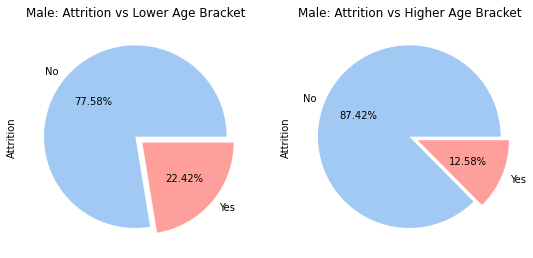

In [ ]:
# Plot attrition percentages vs Age bracket (>35 or <35) for male employees
higherAgeBracketMale = df2[(df1['Age'] >= 35) & (df1['Gender'] == 'Male')]
lowerAgeBracketMale = df2[(df1['Age'] < 35) & (df1['Gender'] == 'Male')]
fig, ax = plt.subplots(1,2, figsize = (16,5))
fhbcolors = [sns.color_palette('pastel')[0], sns.color_palette('pastel')[3]] 
mhbcolors = [sns.color_palette('pastel')[0], sns.color_palette('pastel')[3]] 
higherAgeBracketMale['Attrition'].value_counts().plot.pie(figsize=(9, 5), colors = fhbcolors, autopct='%.2f%%', rot=0, ax = ax[1], title = "Male: Attrition vs Higher Age Bracket", explode=explode)
lowerAgeBracketMale['Attrition'].value_counts().plot.pie(figsize=(9, 5), colors = mhbcolors, autopct='%.2f%%', rot=0, ax = ax[0], title = "Male: Attrition vs Lower Age Bracket", explode =explode)


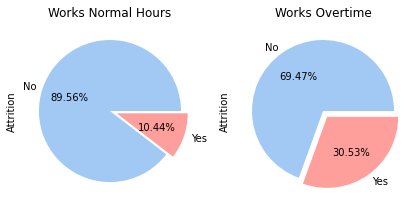

In [ ]:
# Overtime vs Attrition pie charts
df = df1.filter(['OverTime','Attrition'], axis=1)
overtime_df = df[df['OverTime'] =='Yes']
normal_df = df[df['OverTime'] == 'No']
fig, ax = plt.subplots(1,2, figsize = (16,5))
fhbcolors = [sns.color_palette('pastel')[0], sns.color_palette('pastel')[3]] 
normal_df['Attrition'].value_counts().plot.pie(figsize=(7, 5),
                                               colors = fhbcolors,
                                               autopct='%.2f%%',
                                               rot=0, ax = ax[0],
                                               title = "Works Normal Hours",
                                               explode =explode)
overtime_df['Attrition'].value_counts().plot.pie(figsize=(7, 5),
                                                 colors = fhbcolors,
                                                 autopct='%.2f%%',
                                                 rot=0, ax = ax[1],
                                                 title = "Works Overtime",
                                                 explode=explode)



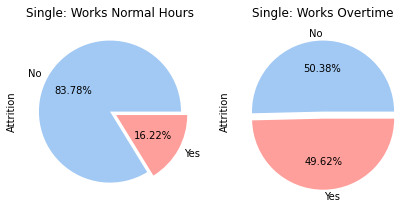

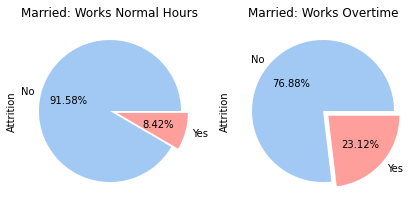

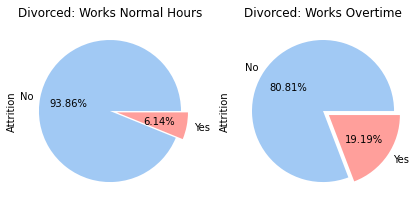

In [ ]:
# Overtime across Marital status vs Attrition pie charts
explode = (0,0.1)
df = df1.filter(['OverTime','Attrition','MaritalStatus'], axis=1)
for status in ["Single","Married","Divorced"]:
  temp_df = df[df["MaritalStatus"]==status]
  overtime_df = temp_df[temp_df['OverTime'] =='Yes']
  normal_df = temp_df[temp_df['OverTime'] == 'No']
  fig, ax = plt.subplots(1,2, figsize = (16,4))
  normal_df['Attrition'].value_counts().plot.pie(figsize=(7, 5),
                                                 colors = fhbcolors,
                                                 autopct='%.2f%%',
                                                 rot=0, ax = ax[0],
                                                 title = status+": Works Normal Hours",
                                                 explode=explode)


  overtime_df['Attrition'].value_counts().plot.pie(figsize=(7, 5),
                                                   colors = fhbcolors,
                                                   autopct='%.2f%%',
                                                   rot=0, ax = ax[1],
                                                   title = status+": Works Overtime",
                                                   explode=explode)

